In [46]:
# from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
# uploaded = files.upload()

In [48]:
data = pd.read_csv("diabetes_prediction_dataset.csv", delimiter=",")

df = pd.DataFrame(data)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Analisis de correlación

In [49]:
gender_prev = {
    "Male": 0,
    "Female": 1
}

smoking_history_prev = {
    "No Info": 0,
    "never": 1,
    "current": 2,
    "not current": 3,
    "former": 4,
    "ever": 5
}

# Funciones para mapear diccionarios al dataset

def reemplazar_categorica(dictionary, targetDf, targetColumn):
  targetDf[targetColumn] = targetDf[targetColumn].replace(dictionary).astype(int)

def reemplazar_rango(valor, diccionario):
  for (valor_minimo, valor_maximo), nuevo_valor in diccionario.items():
    if valor_minimo <= valor < valor_maximo:
      return nuevo_valor
  return 0

corr_analysis = df.copy()

reemplazar_categorica(gender_prev, corr_analysis, "gender")
reemplazar_categorica(smoking_history_prev, corr_analysis, "smoking_history")

df_corr = corr_analysis.corr(method = "pearson")

df_corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030369,-0.014381,-0.077886,-0.019032,0.023023,-0.020044,-0.017196,-0.037623
age,0.030369,1.000000,0.251163,0.233352,0.287051,0.337378,0.101343,0.110679,0.257999
hypertension,-0.014381,0.251163,1.000000,0.121253,0.105558,0.147679,0.080941,0.084436,0.197811
heart_disease,-0.077886,0.233352,0.121253,1.000000,0.100991,0.061203,0.067591,0.070071,0.171718
smoking_history,-0.019032,0.287051,0.105558,0.100991,1.000000,0.187446,0.047459,0.050501,0.122432
bmi,0.023023,0.337378,0.147679,0.061203,0.187446,1.000000,0.083017,0.091310,0.214377
HbA1c_level,-0.020044,0.101343,0.080941,0.067591,0.047459,0.083017,1.000000,0.166831,0.400696
blood_glucose_level,-0.017196,0.110679,0.084436,0.070071,0.050501,0.091310,0.166831,1.000000,0.419587
diabetes,-0.037623,0.257999,0.197811,0.171718,0.122432,0.214377,0.400696,0.419587,1.000000


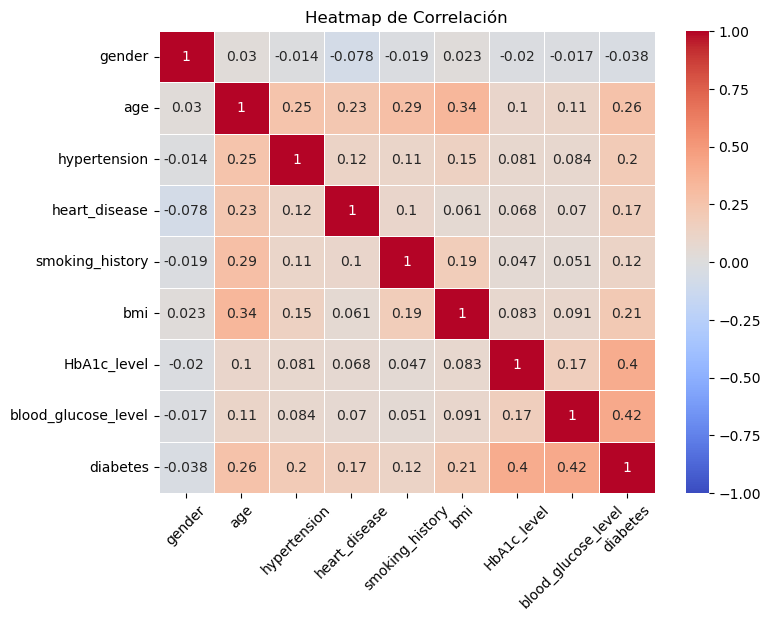

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Heatmap de Correlación')
plt.xticks(rotation = 45)
plt.show()

# Analisis de Outliers por Histograma

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

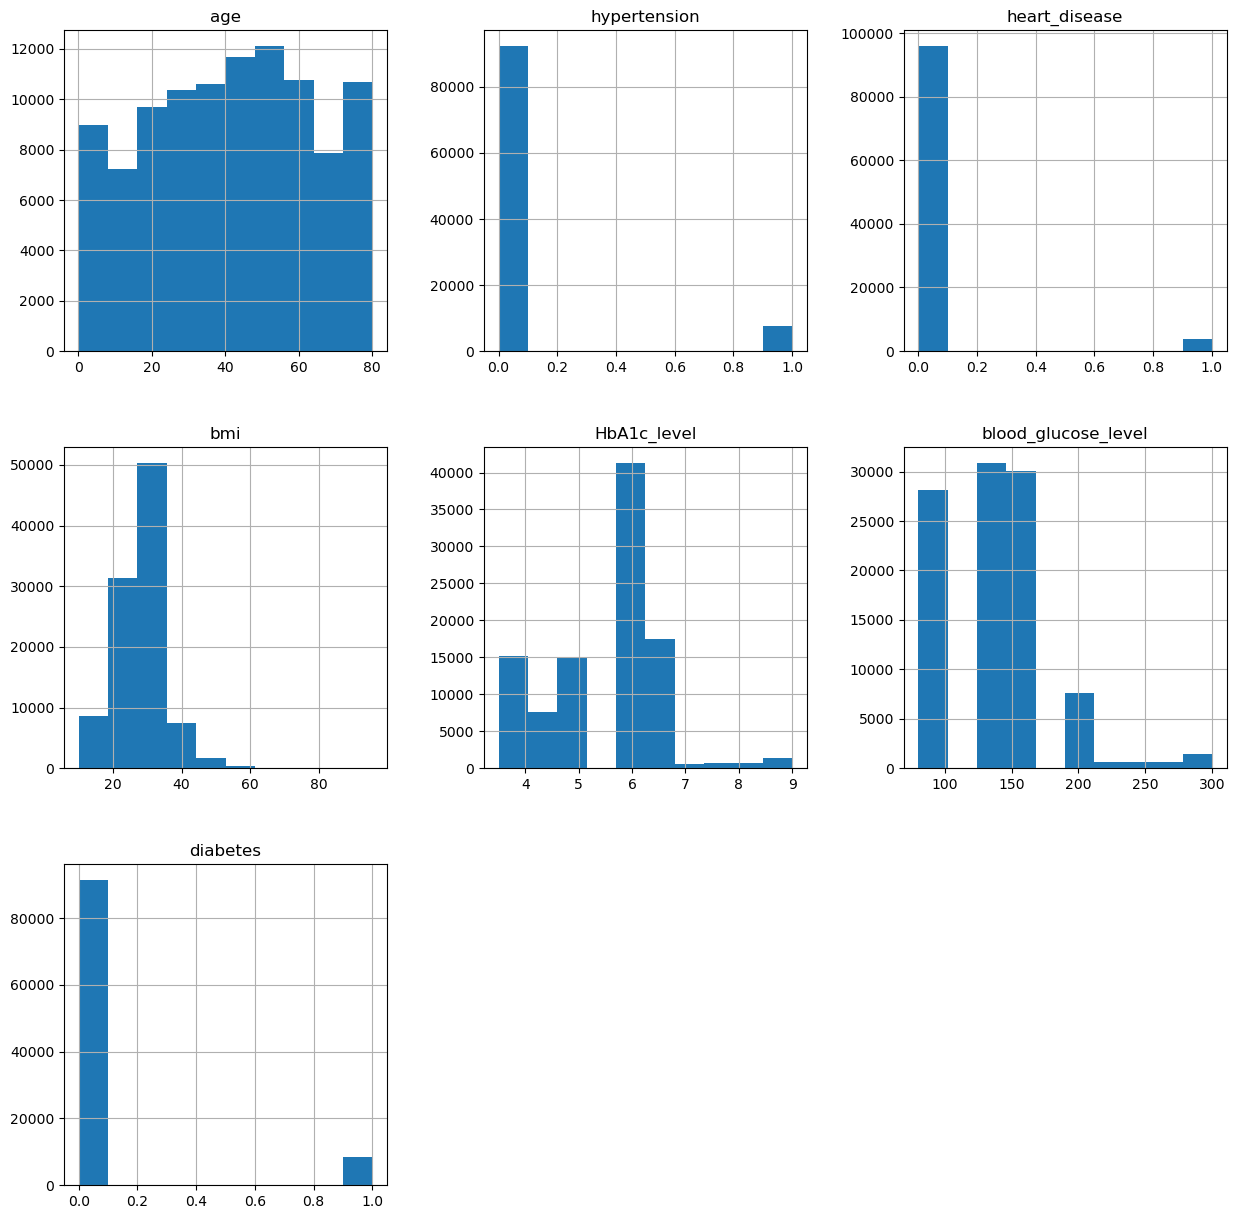

In [51]:
df.hist(figsize=(15, 15)) # Histogramas de todas las columnas

<Axes: xlabel='age', ylabel='Count'>

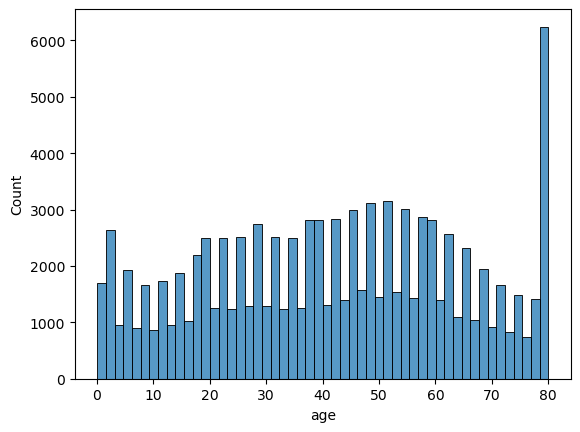

In [52]:
sns.histplot(df["age"])

<Axes: xlabel='bmi', ylabel='Count'>

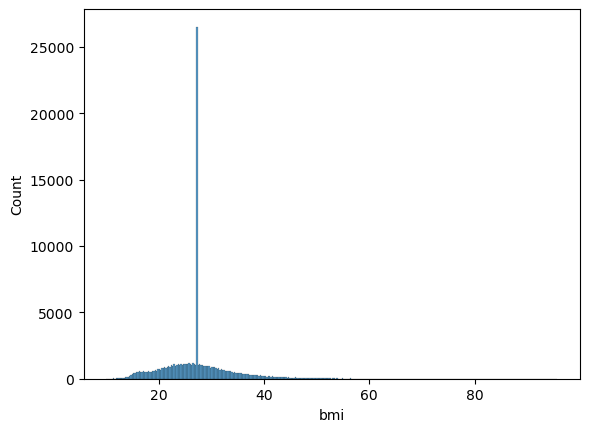

In [53]:
# sns.histplot(df[(df["bmi"] >= 27.320) & (df["bmi"] <= 27.330)])
sns.histplot(df["bmi"])

<Axes: xlabel='HbA1c_level', ylabel='Count'>

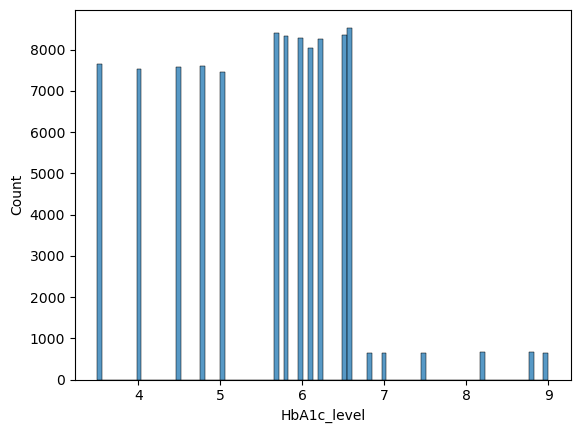

In [54]:
sns.histplot(df["HbA1c_level"])

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

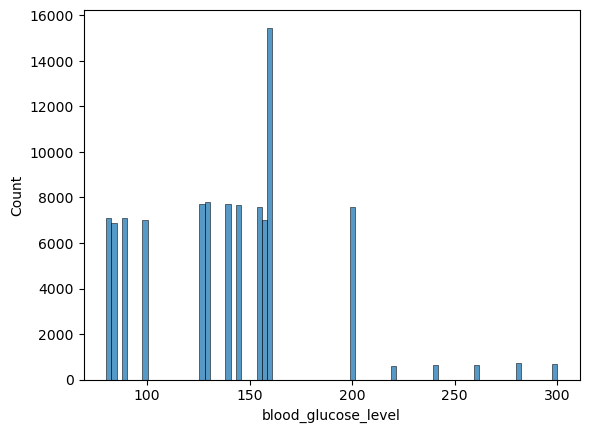

In [55]:
sns.histplot(df["blood_glucose_level"])

# Analisis de Outliers por Rango Intercuartilico (IQR)

In [56]:
def outliers_IQR(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
  return outliers

<Axes: xlabel='bmi', ylabel='Count'>

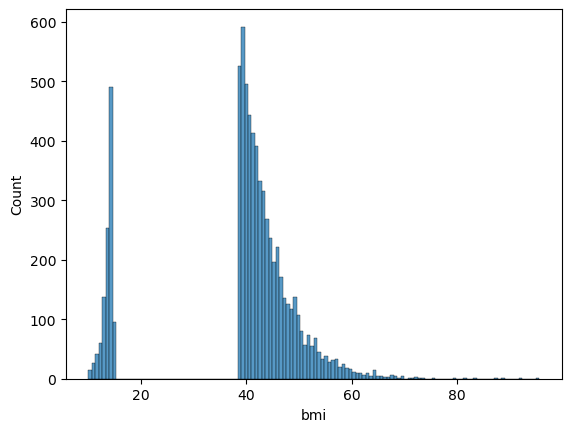

In [57]:
sns.histplot(outliers_IQR("bmi")["bmi"])

<Axes: xlabel='HbA1c_level', ylabel='Count'>

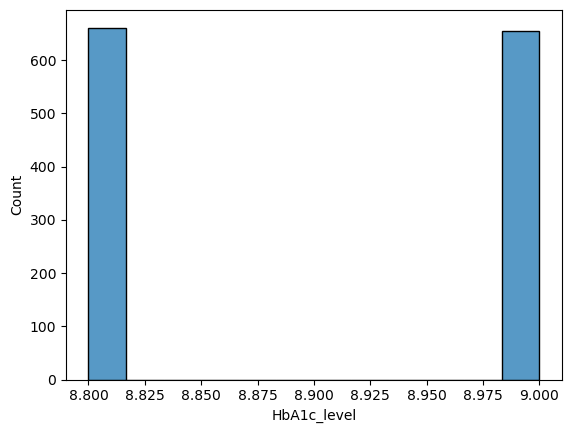

In [58]:
sns.histplot(outliers_IQR("HbA1c_level")["HbA1c_level"])

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

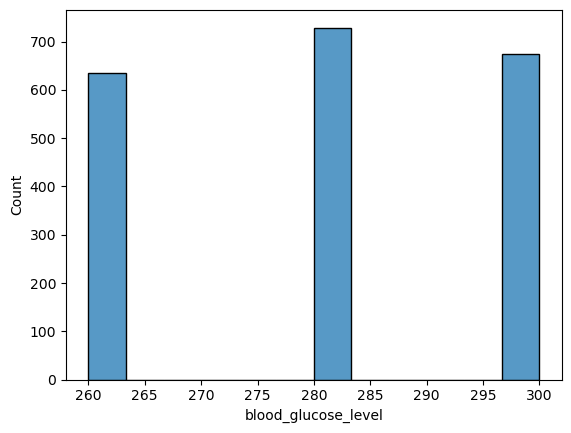

In [59]:
sns.histplot(outliers_IQR("blood_glucose_level")["blood_glucose_level"])

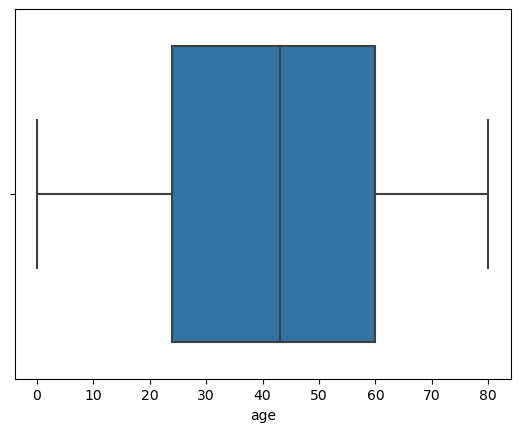

In [60]:
sns.boxplot(x=df["age"])
plt.show()

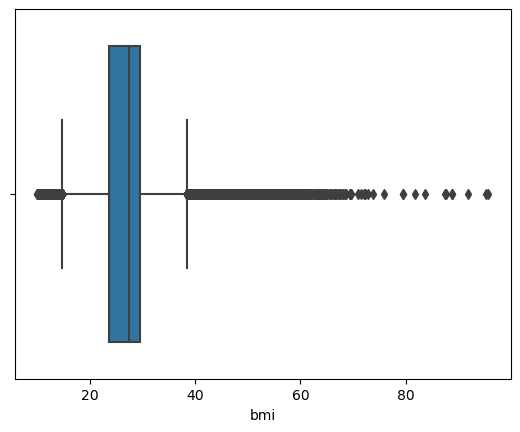

In [61]:
sns.boxplot(x=df["bmi"])
plt.show()

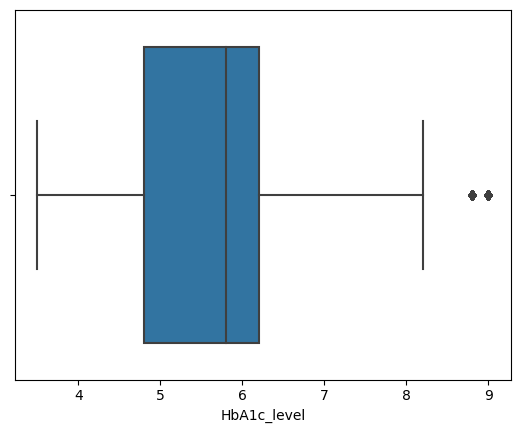

In [62]:
sns.boxplot(x=df["HbA1c_level"])
plt.show()

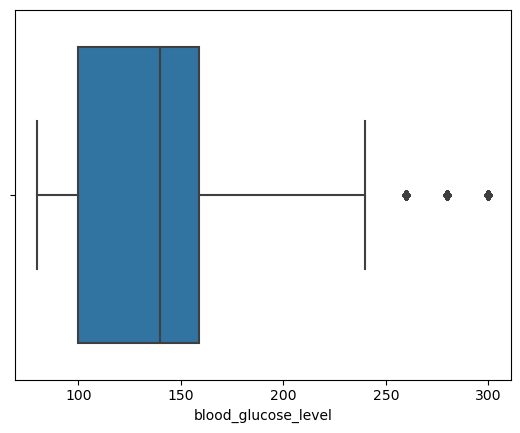

In [63]:
sns.boxplot(x=df["blood_glucose_level"])
plt.show()

# Remocion de Outliers

In [64]:
# Decidi eliminar filas que contengan:

df = df[df["smoking_history"] != "No Info"] # -> No respondio, no lo considero confiable
df = df[df["age"] != 80] # -> Cantidad de filas anormal para la distribucion general de la variable
df = df[df["bmi"] != 27.32] # -> Cantidad de filas anormal para la distribucion general de la variable

df = df[~df["bmi"].isin(outliers_IQR("bmi")["bmi"])] # -> Valores por fuera de las dos desviaciones estandar detectados con IQR

# Analisis de correlacion (post remocion de outliers)

In [65]:
gender = {
    "Male": 0,
    "Female": 1
}

smoking_history = {
    "never": 0,
    "current": 1,
    "not current": 2,
    "former": 3,
    "ever": 4
}

# def reemplazar_categorica(dictionary, targetDf, targetColumn):
#   targetDf[targetColumn] = targetDf[targetColumn].replace(dictionary).astype(int)

# def reemplazar_rango(valor, diccionario):
#   for (valor_minimo, valor_maximo), nuevo_valor in diccionario.items():
#     if valor_minimo <= valor < valor_maximo:
#       return nuevo_valor
#   return 0

corr_analysis_post = df.copy()

reemplazar_categorica(gender, corr_analysis_post, "gender")
reemplazar_categorica(smoking_history, corr_analysis_post, "smoking_history")

df_corr_post = corr_analysis_post.corr(method = "pearson")

df_corr_post

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.035004,-0.044055,-0.103580,-0.086303,-0.040280,-0.036443,-0.032048,-0.069500
age,-0.035004,1.000000,0.253758,0.220806,0.210723,0.269642,0.122206,0.116578,0.264132
hypertension,-0.044055,0.253758,1.000000,0.112389,0.045249,0.148957,0.085251,0.086198,0.189195
heart_disease,-0.103580,0.220806,0.112389,1.000000,0.110564,0.064264,0.073030,0.079350,0.174660
smoking_history,-0.086303,0.210723,0.045249,0.110564,1.000000,0.088464,0.029160,0.027164,0.071257
bmi,-0.040280,0.269642,0.148957,0.064264,0.088464,1.000000,0.089830,0.101041,0.215876
HbA1c_level,-0.036443,0.122206,0.085251,0.073030,0.029160,0.089830,1.000000,0.187933,0.433145
blood_glucose_level,-0.032048,0.116578,0.086198,0.079350,0.027164,0.101041,0.187933,1.000000,0.446432
diabetes,-0.069500,0.264132,0.189195,0.174660,0.071257,0.215876,0.433145,0.446432,1.000000


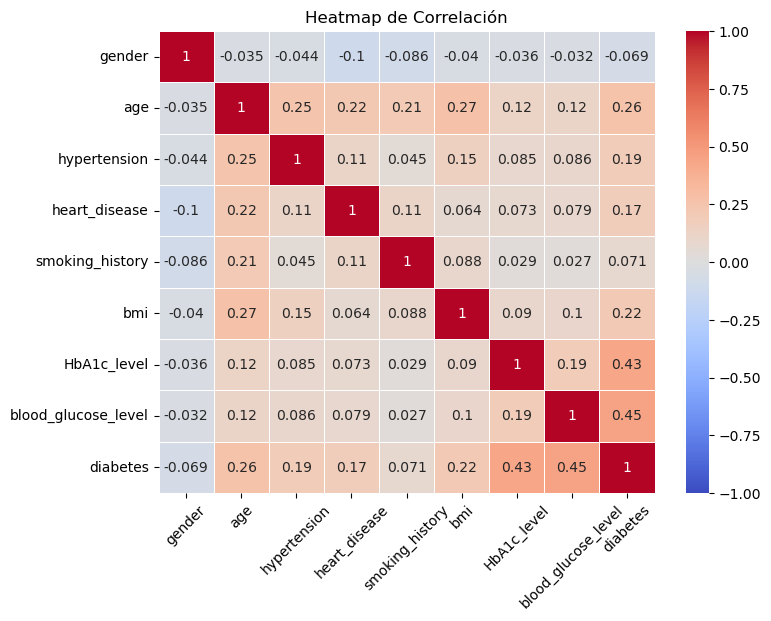

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr_post, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Heatmap de Correlación')
plt.xticks(rotation = 45)
plt.show()

# Normalizacion

Probe normalizar con minMax y con Z-score, el resultado fue una mejor precision con Z-score

In [67]:
df_nrml = df.copy()
reemplazar_categorica(gender, df_nrml, "gender")
reemplazar_categorica(smoking_history, df_nrml, "smoking_history")

In [68]:
# def min_max_scaler(df, columnas):
#     for columna in columnas:
#         minimo = df[columna].min()
#         maximo = df[columna].max()

#         df[columna] = (df[columna] - minimo) / (maximo - minimo)
#     return df

# columnas_a_escalar = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
# df_escalado = min_max_scaler(df_nrml, columnas_a_escalar)

# df_escalado.describe()

In [69]:
def z_score(df):
    columns = df[df.columns]
    columns = columns.drop(columns=["diabetes"])
    
    for cols in columns:
        df[cols] = (df[cols] - df[cols].mean()) / df[cols].std()

    return df

df_escalado = z_score(df_nrml)

df_escalado.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,4.793100e+04,4.793100e+04,4.793100e+04,4.793100e+04,4.793100e+04,4.793100e+04,4.793100e+04,4.793100e+04,47931.000000
mean,-1.046594e-16,-3.895822e-16,-1.215591e-17,2.016103e-17,-8.108883e-17,2.416358e-17,4.459144e-16,-3.107170e-16,0.104191
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.305512
min,-1.249646e+00,-2.410258e+00,-3.231867e-01,-2.082329e-01,-7.487952e-01,-2.813568e+00,-1.888248e+00,-1.415845e+00,0.000000
25%,-1.249646e+00,-7.875820e-01,-3.231867e-01,-2.082329e-01,-7.487952e-01,-7.300562e-01,-6.950490e-01,-9.381135e-01,0.000000
50%,8.002098e-01,8.248581e-02,-3.231867e-01,-2.082329e-01,-7.487952e-01,-1.081594e-01,2.227964e-01,1.734917e-02,0.000000
75%,8.002098e-01,7.894159e-01,-3.231867e-01,-2.082329e-01,7.398196e-01,6.289620e-01,5.899346e-01,4.711940e-01,0.000000
max,8.002098e-01,1.877001e+00,3.094122e+00,4.802215e+00,2.228434e+00,2.832434e+00,3.159902e+00,3.839200e+00,1.000000


# Red Neuronal

In [70]:
columns = ["age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"] # -> 7

X = df_escalado[columns].values
Y = df_escalado["diabetes"].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)



In [71]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)

np.random.seed(30052000)

# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(15, 7)
w_output = np.random.rand(1, 15)

b_hidden = np.random.rand(15, 1)
b_output = np.random.rand(1, 1)


relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# print(b_hidden)
# print(b_output)
# print(w_hidden)
# print(w_output)

# Forward propagation
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


31954


In [ ]:
L = 0.0001  # Tasa de aprendizaje

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

accuracy_test_values = []
accuracy_train_values = []
loss_history = []
error_history = []

# Descenso de gradiente
for i in range(60000):
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

    test_predictions = forward_prop(X_test.T)[3] # Devuelve A2 (prediccion final del modelo)
    test_comparisons = np.equal((test_predictions >= 0.5).astype(int).flatten(), Y_test)
    accuracy_test = np.mean(test_comparisons)
    accuracy_test_values.append(accuracy_test)

    train_predictions = forward_prop(X_train.T)[3]
    train_comparisons = np.equal((train_predictions >= 0.5).astype(int).flatten(), Y_train)
    accuracy_train = np.mean(train_comparisons)
    accuracy_train_values.append(accuracy_train)
    
    loss = -np.mean(Y_sample * np.log(A2) + (1 - Y_sample) * np.log(1 - A2))
    loss_history.append(loss)
    
    error = np.mean((A2 - Y_sample)**2)
    error_history.append(error)

C:\Users\Paulo\AppData\Local\Temp\ipykernel_19120\4051756280.py:56: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(Y_sample * np.log(A2) + (1 - Y_sample) * np.log(1 - A2))
C:\Users\Paulo\AppData\Local\Temp\ipykernel_19120\4051756280.py:56: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(Y_sample * np.log(A2) + (1 - Y_sample) * np.log(1 - A2))


In [29]:
def accuracy_graph(accuracy_train_values, accuracy_test_values):
    plt.plot(accuracy_train_values, label='Train')
    plt.plot(accuracy_test_values, label='Test')
    plt.xlabel('Iteracion')
    plt.ylabel('Precisión')
    plt.title('Precision a lo largo del entrenamiento')
    plt.legend()

    plt.show()
    
def loss_graph(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida (Entropía Cruzada)')
    plt.title('Función de Pérdida durante el Entrenamiento')
    plt.show()

def error_graph(error_history):
    plt.plot(error_history)
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.title('Función de Costo durante el Entrenamiento')
    plt.show()

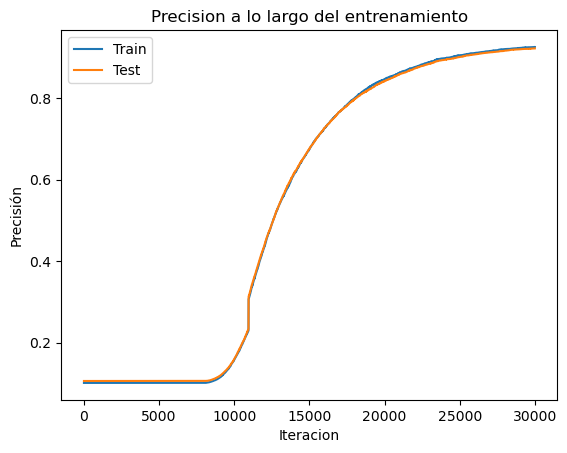

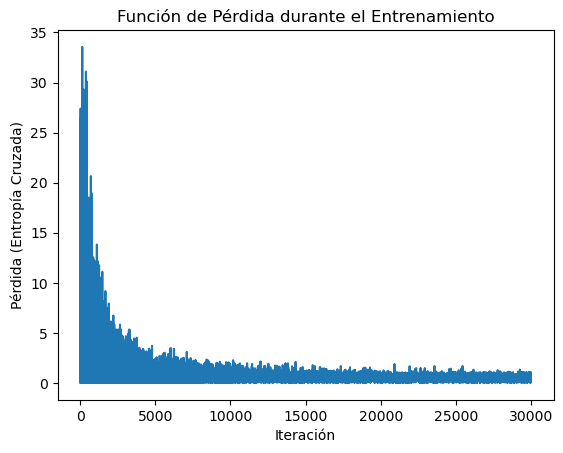

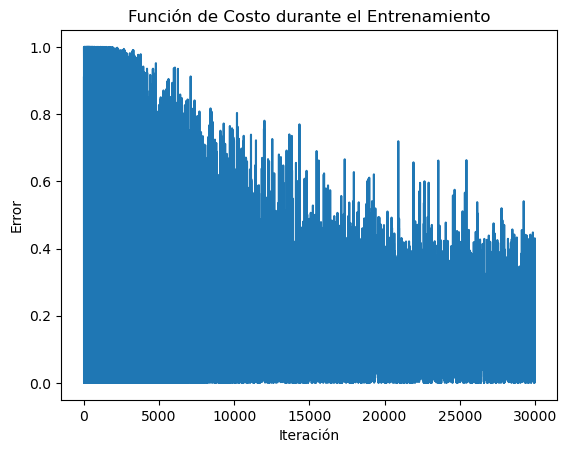

Test Accuracy: 92.54%
Train Accuracy: 92.20%


In [30]:
# 15 neuronas, L = 0.0001, 30000 iteraciones
accuracy_graph(accuracy_test_values, accuracy_train_values)
loss_graph(loss_history)
error_graph(error_history)

print(f'Test Accuracy: {accuracy_test * 100:.2f}%')
print(f'Train Accuracy: {accuracy_train * 100:.2f}%')

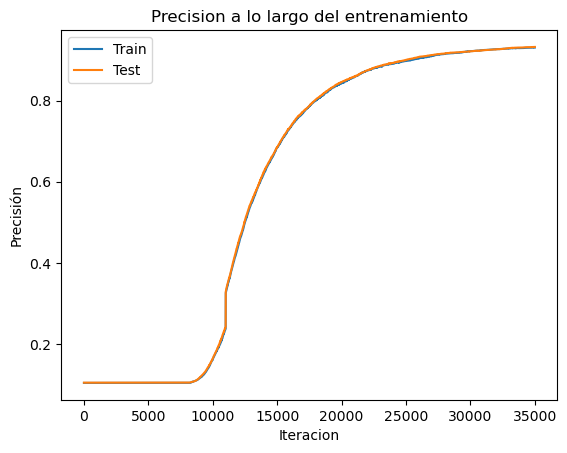

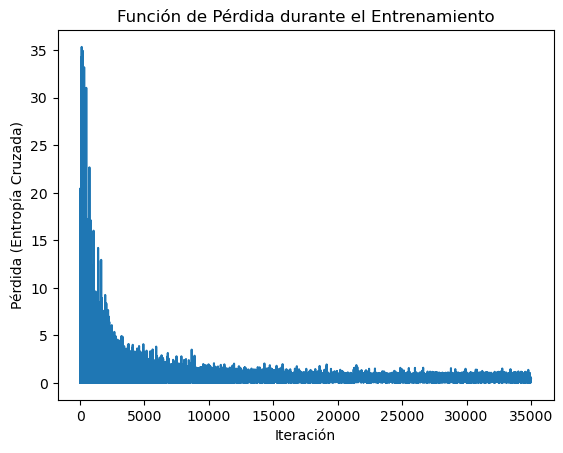

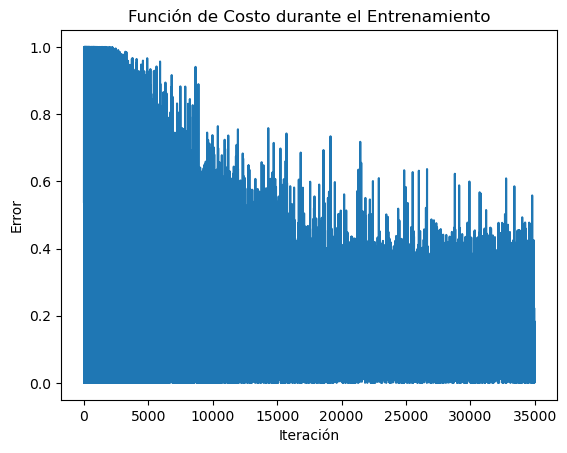

Test Accuracy: 93.08%
Train Accuracy: 93.24%


In [45]:
# 15 neuronas, L = 0.0001, 35000 iteraciones
accuracy_graph(accuracy_test_values, accuracy_train_values)
loss_graph(loss_history)
error_graph(error_history)

print(f'Test Accuracy: {accuracy_test * 100:.2f}%')
print(f'Train Accuracy: {accuracy_train * 100:.2f}%')

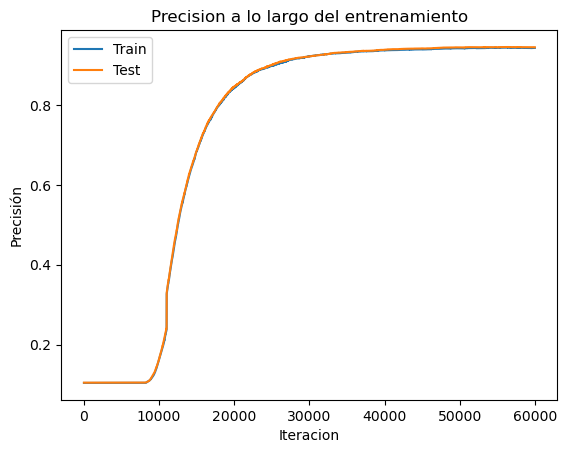

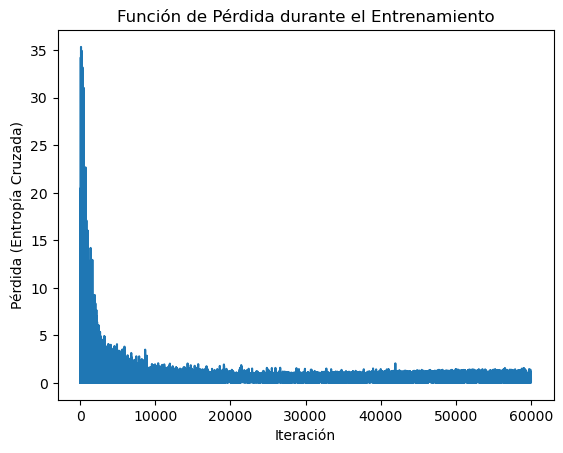

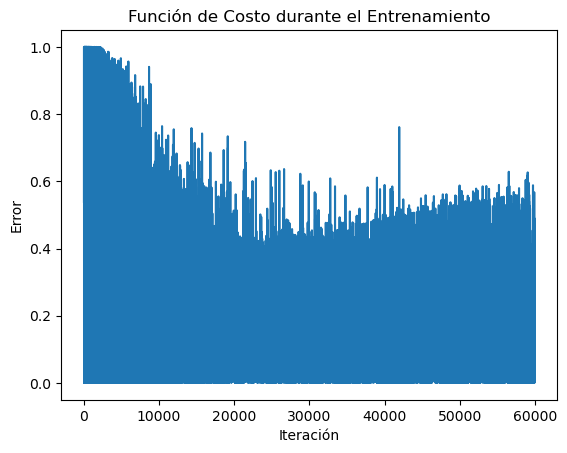

Test Accuracy: 94.29%
Train Accuracy: 94.45%


In [39]:
# 15 neuronas, L = 0.0001, 60000 iteraciones
accuracy_graph(accuracy_test_values, accuracy_train_values)
loss_graph(loss_history)
error_graph(error_history)

print(f'Test Accuracy: {accuracy_test * 100:.2f}%')
print(f'Train Accuracy: {accuracy_train * 100:.2f}%')

In [41]:
df_pred = df.copy()
reemplazar_categorica(gender, df_pred, "gender")
reemplazar_categorica(smoking_history, df_pred, "smoking_history")

def diabetes_prediction():
    age = float(input("Ingrese edad (0 a 79)"))
    hypertension = int(input("Ingrese hipertension (0 o 1)"))
    heart_disease = int(input("Ingrese enfermedades cardiacas (0 o 1)"))
    smoking_history = int(input("Ingrese historial de tabaquismo (actualmente = 0, ex fumador = 1, no actualmente = 2, nunca = 3, de vez en cuando = 4)"))
    bmi = float(input("Ingrese indice de masa corporal (bmi de 10.16 a 71.55)"))
    HbA1c_level = float(input("Ingrese niveles de hemoglobina glucosilada (HbA1c de 3.5 a 9.0)"))
    blood_glucose_level = int(input("Ingrese niveles de glucosa en sangre (80 a 300)"))
    
    values = [
        [age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level]
              ]
    
    columns = df_pred[df.columns]
    columns = columns.drop(columns=["gender"])
    columns = columns.drop(columns=["diabetes"])
    
    # Normalizamos las nuevas entradas
    for i, col in enumerate(columns):
        values[0][i] = (values[0][i] - df_pred[col].mean()) / df_pred[col].std()
    
    Z1, A1, Z2, A2 = forward_prop(np.array(values).T)
    
    print(A2)

diabetes_prediction()

[[0.97756516]]


# Red Neuronal con scikit-learn

In [31]:
columns = ["age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"]
X = df_escalado[columns].values
Y = df_escalado["diabetes"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=3005200)

In [32]:
def sklearn_neural_network(x_train, x_test, y_train, y_test, hidden_layers_size, iterations, L):
    classifier = MLPClassifier(hidden_layer_sizes=(hidden_layers_size), activation='relu', solver='sgd', random_state=3005200, max_iter=iterations, learning_rate_init=L)
    classifier.fit(x_train, y_train)

    predictions = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(report)

Resultados con igual configuracion:

In [42]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (15,), 35000, 0.0001)

Accuracy: 0.9476121925267572
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14319
           1       0.85      0.60      0.70      1658

    accuracy                           0.95     15977
   macro avg       0.90      0.79      0.84     15977
weighted avg       0.94      0.95      0.94     15977



In [37]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (15,), 45000, 0.0001)

Accuracy: 0.9476121925267572
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14319
           1       0.85      0.60      0.70      1658

    accuracy                           0.95     15977
   macro avg       0.90      0.79      0.84     15977
weighted avg       0.94      0.95      0.94     15977



In [38]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (15,), 60000, 0.0001)

Accuracy: 0.9476121925267572
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14319
           1       0.85      0.60      0.70      1658

    accuracy                           0.95     15977
   macro avg       0.90      0.79      0.84     15977
weighted avg       0.94      0.95      0.94     15977



Resultados con distintas configuraciones:

In [44]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (45,), 15000, 0.005)

Accuracy: 0.9621330662827815
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14319
           1       0.97      0.66      0.78      1658

    accuracy                           0.96     15977
   macro avg       0.96      0.83      0.88     15977
weighted avg       0.96      0.96      0.96     15977



In [33]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (15,10,), 1000, 0.005)

Accuracy: 0.9646366652062339
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14319
           1       0.97      0.68      0.80      1658

    accuracy                           0.96     15977
   macro avg       0.97      0.84      0.89     15977
weighted avg       0.96      0.96      0.96     15977



In [47]:
sklearn_neural_network(X_train, X_test, Y_train, Y_test, (15,10,), 15000, 0.005)

Accuracy: 0.9646366652062339
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14319
           1       0.97      0.68      0.80      1658

    accuracy                           0.96     15977
   macro avg       0.97      0.84      0.89     15977
weighted avg       0.96      0.96      0.96     15977

